In [70]:
#pysr symbolic regression method
#Using from the 'dataset_2.csv'
#import all the necessary libraries
import time
import numpy as np
import pandas as pd
from pysr import *
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

#Load data and read data from csv dataset_2
data = pd.read_csv('dataset_2.csv')
X = data.iloc[:, :-1] #All the independent variables will remain except target or dependent varaiable
y = data.iloc[:, -1]  #Only target or dependent varaiable will remain 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [71]:
default_pysr_params = dict(
    populations=15, # Number of populations running, default: 15
    population_size=33, #Number of individuals in each population, default: 33
    ncyclesperiteration=550, # No.of total mutations to run, per 10 samples of the population, per iteration,default:550
    model_selection="best",
)
# Learn equations symbolic regression
model = PySRRegressor(
    niterations=100, #To have better score need to increase the value
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sin"],
    loss="loss(prediction, target) = (prediction - target)^2", # ^ Custom loss function (julia syntax)
    **default_pysr_params    
)

In [72]:
#Start model training run time
start_time = time.time()

In [73]:
#Train the mdoel 
model.fit(X_train, y_train)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                       0.0062825824   
	1         0.200833                                (x4 * 0.0006290745)   
	2         0.356768                                   ((x5 / x1) / x3)   
	3         0.117990                    (x5 / ((x3 / x4) / 0.16241634))   
	4         0.194275             (((0.19752505 / (x3 / x4)) * x5) * x5)   
	5         0.117209      ((0.14228661 / ((x3 / (x4 * x5)) - x6)) * x5)   
	6         0.000706   sin((0.14228661 / ((x3 / (x4 * x5)) - x6)) * x5)   
	7         0.021055  (0.14228661 / ((((x3 / (x4 + x5)) / x5) / x5) ...   
	8         0.078343  (0.14228661 / ((((x3 / (x4 + 2.3801756)) / x5)...   
	9         0.066156  (x5 / ((x3 / x0) / (((x0 + (x6 + x0)) / x1) * ...   
	10        0.160696  ((1.4917644 / ((((x3 * x1) / x0) / (x0 + sin(x...   
	11        0.139525  (x5 / (((x3 / x5) / x0) / (((x0 + (x6 + x0)) /...   
	12        0.049606  (x5 / (((x3 / x5) / x0) / (((x0 + (x6 + x0)) /...   
	13        0.051401  (x5 / (((x3 / x5) / x0) / (((x0 + ((x6 + x1) +...   
	14  >>>>  0.238189  ((1.4917644 / (((((x3 / x5) * x1) / x0) / ((x0...   
	
	        loss  complexity  
	0   0.000171           1  
	1   0.000115           3  
	2   0.000056           5  
	3   0.000044           7  
	4   0.000030           9  
	5   0.000024          11  
	6   0.000024          12  
	7   0.000023          13  
	8   0.000022          14  
	9   0.000020          15  
	10  0.000017          16  
	11  0.000015          17  
	12  0.000014          18  
	13  0.000013          19  
	14  0.000011          20  
]

In [74]:
#End run time
end_time = time.time()

# Calculate the runtime
runtime = end_time - start_time
print("Runtime: ", runtime, "seconds")

# Make predictions on the test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)

Runtime:  258.9928035736084 seconds
RMSE: 0.002599735270252619
MAE: 0.0014456182348988192


In [75]:
#To check the R-Squarede predection score of the model
model.score(X_test,y_test)

0.9673318985555169

In [76]:
#Display all the discovered  mathematical equations
model.equations_

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,0.000171,0.000000,0.0062825824,0.00628258240000000,PySRFunction(X=>0.00628258240000000)
1,3,0.000115,0.200833,(x4 * 0.0006290745),0.0006290745*x4,PySRFunction(X=>0.0006290745*x4)
2,5,0.000056,0.356768,((x5 / x1) / x3),x5/(x1*x3),PySRFunction(X=>x5/(x1*x3))
3,7,0.000044,0.117990,(x5 / ((x3 / x4) / 0.16241634)),0.16241634*x4*x5/x3,PySRFunction(X=>0.16241634*x4*x5/x3)
4,9,0.000030,0.194275,(((0.19752505 / (x3 / x4)) * x5) * x5),0.19752505*x4*x5**2/x3,PySRFunction(X=>0.19752505*x4*x5**2/x3)
5,11,0.000024,0.117209,((0.14228661 / ((x3 / (x4 * x5)) - x6)) * x5),0.14228661*x5/(x3/(x4*x5) - x6),PySRFunction(X=>0.14228661*x5/(x3/(x4*x5) - x6))
6,12,0.000024,0.000706,sin((0.14228661 / ((x3 / (x4 * x5)) - x6)) * x5),sin(0.14228661*x5/(x3/(x4*x5) - x6)),PySRFunction(X=>sin(0.14228661*x5/(x3/(x4*x5) ...
7,13,0.000023,0.021055,(0.14228661 / ((((x3 / (x4 + x5)) / x5) / x5) ...,0.14228661/(x3/(x5**2*(x4 + x5)) - x6),PySRFunction(X=>0.14228661/(x3/(x5**2*(x4 + x5...
8,14,0.000022,0.078343,(0.14228661 / ((((x3 / (x4 + 2.3801756)) / x5)...,0.14228661/(x3/(x5**2*(x4 + 2.3801756)) - sin(...,PySRFunction(X=>0.14228661/(x3/(x5**2*(x4 + 2....
9,15,0.000020,0.066156,(x5 / ((x3 / x0) / (((x0 + (x6 + x0)) / x1) * ...,x0*x5**2*(2*x0 + x6)/(x1*x3),PySRFunction(X=>x0*x5**2*(2*x0 + x6)/(x1*x3))


In [77]:
#Discover the mathematical equations of the model(expressions)
model.sympy()

1.4917644*x0*x5**3*(x0 + x1 + sin(x6))/(x1*x3)

In [78]:
#Dolanload generated best model equation
with open(f'dataset_2_best_model', 'w') as f:
 f.write(str(model.sympy()))

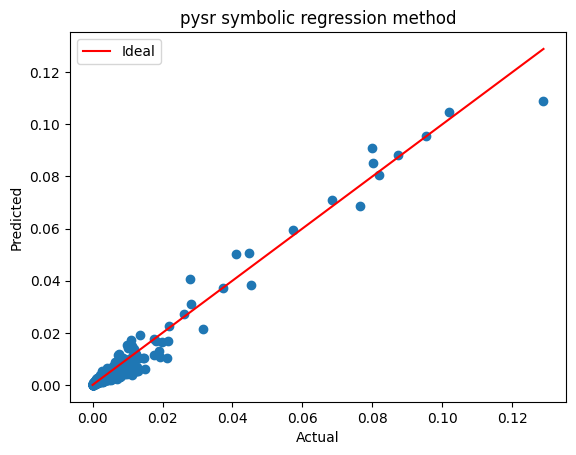

In [79]:
# Generate predictions for training and testing data
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Plot the actual vs predicted values for testing data
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('pysr symbolic regression method')
plt.legend()
plt.show()